# Import BAM mapped read files from RNA-Seq data, plot coverage and test some basic properties 

Please use the next cell to adjust the two following variables according to your installation: 
- path to GRATIOSA package
- path to database

In [90]:
#%load_ext autoreload
#%autoreload 2
import sys
## PATH TO PACKAGE:
## ----------------
## IF ALREADY IN YOUR PYTHON PATH (e.g. installation through Pip): nothing to do
## IF NOT IN YOUR PYTHON PATH (e.g. download from GitHub): 
## uncomment and adjust the following relevant line to the location of the GRATIOSA directory
## - For Linux/MacOS:             typical style ;-)
#sys.path.append('/home/usr/Python_venv/lib/python3.8/site-packages/') 
sys.path.insert(0,"/home/s/Downloads/GRATIOSA-master/")
#sys.path.append("/home/s/Downloads/GRATIOSA-master/")
## (- For Windows:                  typical style ;-)
#sys.path.append('C:\\Downloads\\GRATIOSA-master')

import os
## PATH TO DATABASE:
## -----------------
## FOR REGULAR USE OF THE PACKAGE:
#  Please set your system environment variable \$GRATIOSA_DB_PATH in order to have 
#  \$GRATIOSA_DB_PATH + data/organisms (e.g. export GRATIOSA_DB_PATH=/home/usr/documents/GRATIOSA/).
## FOR THIS TUTORIAL ONLY:
#  you can skip the system environment variable and just use the following line
#  We assume that the "data" directory containing the database is in the parent directory (otherwise adjust line)
os.environ["GRATIOSA_DB_PATH"]=os.getcwd()+"/../"
print("Using the database stored in: %s. Please check that this is correct."%(os.environ["GRATIOSA_DB_PATH"]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using the database stored in: /home/s/maiwenn_PhD/article_GRATIOSA/revision/tutorials/../. Please check that this is correct.


In [91]:
# Loading the modules for data loading
from GRATIOSA import Genome, Transcriptome, GO

# Loading the statistical analysis and graphic modules
from GRATIOSA import plot_genome, plot_stat_analysis
import numpy as np

## 1 - Import and plot the RNA-Seq coverage

In [92]:
g = Genome.Genome("dickeya")
g.load_seq()
g.load_annotation(features=["CDS"])

Detected a genome with 1 chromosome
Chromosome Chromosome of length 4922802
Sequence of organism dickeya loaded
Trying to load annotation from: /home/s/maiwenn_PhD/article_GRATIOSA/revision/tutorials/../data/dickeya/annotation/sequence.gff3
Annotation of dickeya loaded
Number of genes: 4351


In [93]:
tr=Transcriptome.Transcriptome(g)
# The BAM files were copied in the "rnaseq_reads" directory, and the "reads.info" file was modified to point to them
# Load coverage files, asking to compute it from the BAM files
# CAUTION: long at first execution, because the coverage files need to be computed
# and the "cov.info" file in "rnaseq_cov" directory is modified
# Subsequently, the same function can be run without re-computing the coverage files (change option to False)
# CAUTION: in this dataset, the sequencing was carried on the opposite strand, so the coverage needs to be computed
# on the complementary strand compared to the coordinates in the BAM files (rev=True)
#tr.load_rnaseq_cov(compute_from_bam=True, rev=True)
tr.load_rnaseq_cov(compute_from_bam=True,rev=True)

Detected a genome with 1 chromosome
Chromosome Chromosome of length 4922802
Sequence of organism dickeya loaded
Loading condition seco_TNS1
Loading condition seco_TS1


In [94]:
# Check the list of experimental conditions where the coverage was loaded
tr.rnaseq_cov_pos.keys()

dict_keys(['seco_TNS1', 'seco_TS1'])

In [95]:
# Look for help on plotting function
?plot_genome.plot_region

Saved as /home/s/maiwenn_PhD/article_GRATIOSA/revision/tutorials/../resdir/Genome_plot/Genome_2024-06-11 16:02:33.023013.pdf


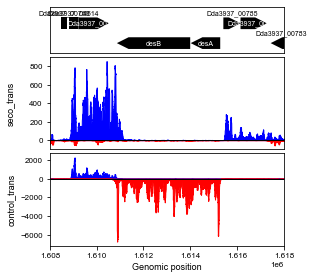

In [96]:
# Plot the coverage at a particular location
# In this case we see the extinction of the desAB operon when TopoI is inhibited by seconeolitsine
plot_genome.plot_region(g, beg=1608000, end=1618000, RNASeq_cond=["seco_TNS1", "seco_TS1"], tr_object=tr, R_ylabels=["seco_trans", "control_trans"], figsize=(5,4), gene_names=True)

## 2 - Load the differential expression between conditions

In [97]:
# The differential expression could be cosmputed from the coverage values
# using two functions successively: compute_rpkm_from_cov and compute_fc_from_expr
# However, we recommend loading the differential expression files obtained from a standard specialized external program such as DESeq2 (from the BAM files), which optimizes statistical power
# The output files from DESeq2 were saved in the "fold_changes" directory, and the "fc.info" file was modified accordingly
tr.load_fc_pval()

Loading condition: seco_trans
	66 locus are not in annotation


In [98]:
# Separate the genes into categories: activated, repressed or non-responsive to topoI inhibition
tr.compute_state_from_fc(thresh_pval=0.1)

## 3 - Simple test on the relation between orientation and response to topoisomerase I inhibition 

In [99]:
# Compute the orientation of each gene
g.load_gene_orientation()

Operation load_neighbor_all completed for genome dickeya
Operation load_gene_orientation completed for genome dickeya


convergent: 90 elements
tandem: 301 elements
divergent: 100 elements
One-sided test	p-value between convergent and tandem

Larger	0.09778575315537602

Smaller	0.9022142468446239

One-sided test	p-value between convergent and divergent

Larger	0.03187303366799421

Smaller	0.9681269663320058

One-sided test	p-value between tandem and divergent

Larger	0.15924108988145536

Smaller	0.8407589101185446

Results saved in /home/s/maiwenn_PhD/article_GRATIOSA/revision/tutorials/../resdir/proportion_test/prop_test2024-06-11 16:10:19.188588


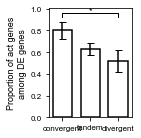

In [105]:
plot_stat_analysis.plot_proportion_test(dict_cats=g.orientation, dict_features=tr.statesFC["seco_trans"], targ_features=["act"], all_features=["act","rep"], cats=["convergent","tandem","divergent"], alt_hyp="one-sided", ylabel="Proportion of act genes\namong DE genes", figsize=(2,2), output_file="Dickeya_orientation_TopoI")

Divergent genes are significantly more inhibited by topoisomerase I inhibition than convergent ones, whereas tandem genes are in the middle. 